In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt     


In [2]:

def plot_history(history : tf.keras.callbacks.History):
    """ This helper function takes the tensorflow.python.keras.callbacks.History
    that is output from your `fit` method to plot the loss and accuracy of
    the training and validation set.
    """
    fig, axs = plt.subplots(1,2, figsize=(12,6))
    axs[0].plot(history.history['accuracy'], label='training set')
    axs[0].plot(history.history['val_accuracy'], label = 'validation set')
    axs[0].set(xlabel = 'Epoch', ylabel='Accuracy', ylim=[0, 1])

    axs[1].plot(history.history['loss'], label='training set')
    axs[1].plot(history.history['val_loss'], label = 'validation set')
    axs[1].set(xlabel = 'Epoch', ylabel='Loss', ylim=[0, 10])
    
    axs[0].legend(loc='lower right')
    axs[1].legend(loc='lower right')




In [3]:
#this is a new directory that has the total train_set from 00 to 10; NOT ano!!!
directory = './dataset/' 
img_dim = 128


In [4]:
#data_set 
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    
    color_mode="grayscale",
    
    image_size=(img_dim,img_dim),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='training',
    interpolation="bilinear",
    follow_links=False,
)

Found 6571 files belonging to 6 classes.
Using 5257 files for training.


In [5]:
#parameters
input_size = 128
filter = 32


strides = (2,2)
pool_size = (2,2)
kernel_size = (5,5)

In [6]:
from tensorflow.keras import layers, models

# Create the first version of the model
model = models.Sequential([
    layers.Conv2D(filters=filter,kernel_size=kernel_size,kernel_regularizer=tf.keras.regularizers.l2(0.0001),activation='relu',input_shape=(128,128,1)),
    layers.MaxPooling2D(pool_size=pool_size,strides=strides,padding='same'),
    layers.Dropout(0.5),
    layers.Conv2D(filters=filter/2,kernel_size=kernel_size,kernel_regularizer=tf.keras.regularizers.l2(0.0001),activation='relu'),
    layers.MaxPooling2D(pool_size=pool_size,strides=strides,padding='same'),
    layers.Dropout(0.5),
    layers.Flatten(),
    #layers.Dense(128,activation='relu'),
    layers.Dense(6,activation='Softmax'),
    
    
    
])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 62, 62, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 58, 16)        12816     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 16)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 29, 29, 16)        0

In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
#using the GPU
with tf.device('/GPU:0'):
    history = model.fit(train_dataset,epochs=10)

Epoch 1/10
165/165 [==============================] - 12s 48ms/step - loss: 94.0086 - accuracy: 0.2279 0s - loss: 96.0399 - accura
Epoch 2/10
165/165 [==============================] - 8s 48ms/step - loss: 58.2725 - accuracy: 0.3044: 2s - l
Epoch 3/10
165/165 [==============================] - 8s 48ms/step - loss: 41.4357 - accuracy: 0.3622
Epoch 4/10
165/165 [==============================] - 8s 48ms/step - loss: 31.3791 - accuracy: 0.3863
Epoch 5/10
165/165 [==============================] - 8s 48ms/step - loss: 24.5315 - accuracy: 0.4109
Epoch 6/10
165/165 [==============================] - 8s 48ms/step - loss: 18.5351 - accuracy: 0.4227
Epoch 7/10
165/165 [==============================] - 8s 47ms/step - loss: 14.5967 - accuracy: 0.4476
Epoch 8/10
165/165 [==============================] - 8s 48ms/step - loss: 11.1444 - accuracy: 0.4626: 0s - loss: 11.2041 - accuracy:
Epoch 9/10
165/165 [==============================] - 8s 47ms/step - loss: 8.7583 - accuracy: 0.4858
Epoch 10/10
16

In [9]:
print(model.metrics)

[<keras.metrics.Mean object at 0x0000021F9EE272E0>, <keras.metrics.MeanMetricWrapper object at 0x0000021F9F341D90>]


KeyError: 'val_accuracy'

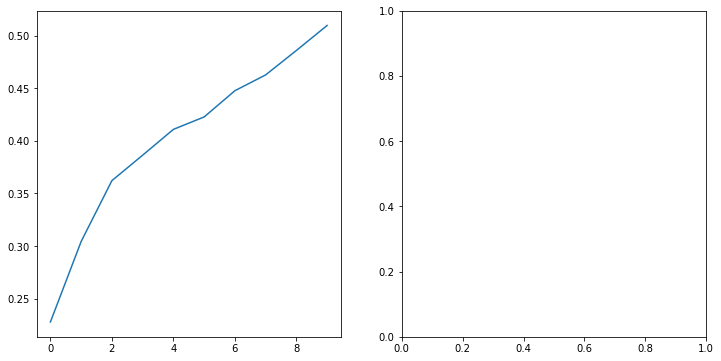

In [10]:
plot_history(history)

In [ ]:
model.evaluate(train_dataset)

In [ ]:
#model.save('modeltf')